# Quantum Teleportation

This notebook intends to demonstrate quantum teleportation.

## Background

Quantum Teleportation is a operation that can "teleport" the state of one qubit to another qubit over large distances.

## Implementation

First off, we satisfy the technical necessities.

In [ ]:
from qiskit import *
%matplotlib inline

Now, we create a circuit ```qc``` of 3 qubits and 3 classical bits (to store the measurements).

In [ ]:
qc = QuantumCircuit(3, 3)

Now, we apply an operation to modify the 0th qubit to some value that we want to teleport.

NOTE: You may change this section of code to represent whatever value you like.

In [ ]:
qc.h(0) 

Here is a schematic diagram of the circuit.

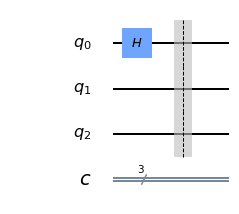

In [ ]:
qc.barrier()
qc.draw('mpl')

Now we apply the quantum teleportation circuit.

In [ ]:
qc.h(1) 
qc.cx(1,2) # Creates entangled Bell Pair b/w qubits 1 and 2

# This is where teleportation happens
qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.measure([0, 1], [0, 1])
qc.barrier()

qc.cx(1,2)
qc.cz(0, 2)

qc.measure(2, 2)

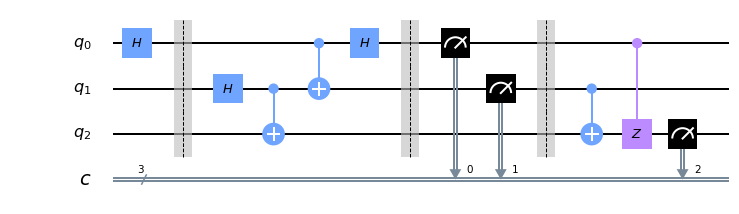

In [ ]:
qc.draw('mpl')

At this point, the qubit qc\[2\] contains the value of qc\[0\] at the first barrier.

Now, we write some code to  either:-

1. Simulate our experiment on this classical computer
2. Run our experiment on IBM-Q

### Simulation

In [ ]:
# simulator_state = Aer.get_backend('statevector_simulator')
simulator_qasm = Aer.get_backend('qasm_simulator')
# job_state = execute(qc, simulator_state, shots = 1024)
job_qasm = execute(qc, simulator_qasm, shots = 1024)

In [ ]:
# print("State Vector job: " + str(job_state.status()))
print("QASM Simulation job: " + str(job_qasm.status()))

QASM Simulation job: JobStatus.DONE


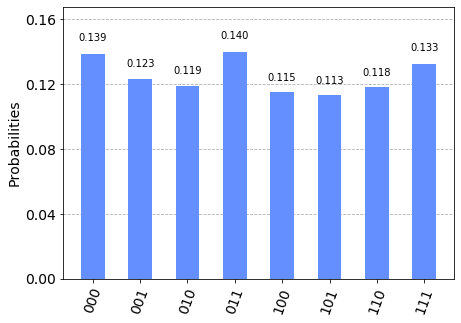

In [ ]:
# result_state = job_state.result()
# print("State Vector: " + str(result_state.get_statevector(qc)))

result_qasm = job_qasm.result()
count = result_qasm.get_counts()
# print("QASM: " + str(result_qasm.get_counts()))

from qiskit.tools.visualization import plot_histogram

plot_histogram(count)